<a href="https://colab.research.google.com/github/edlorencetti/Curso-Ci-ncia-de-dados/blob/master/ESTUDOS_MACHINE_LEARNINIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Bibliotecas para os estudos

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

Importando arquivo para estudo

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [0]:
credito = pd.read_csv('Credit.csv')

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [0]:
previsores = credito.iloc[:,0:20].values

In [0]:
classe = credito.iloc[:,20].values

Fazendo a mudança dos itens das colunas categoricas

In [0]:
labelencoder = LabelEncoder()

In [0]:
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])

Visualizando as 10 primeiras linhas da tabela

In [9]:
previsores[0:10]

array([[2, 6, "'critical/other existing credit'", 'radio/tv', 1169,
        "'no known savings'", '>=7', 4, "'male single'", 'none', 4,
        "'real estate'", 67, 'none', 'own', 2, 'skilled', 1, 'yes',
        'yes'],
       [1, 48, "'existing paid'", 'radio/tv', 5951, '<100', '1<=X<4', 2,
        "'female div/dep/mar'", 'none', 2, "'real estate'", 22, 'none',
        'own', 1, 'skilled', 1, 'none', 'yes'],
       [0, 12, "'critical/other existing credit'", 'education', 2096,
        '<100', '4<=X<7', 2, "'male single'", 'none', 3, "'real estate'",
        49, 'none', 'own', 1, "'unskilled resident'", 2, 'none', 'yes'],
       [2, 42, "'existing paid'", 'furniture/equipment', 7882, '<100',
        '4<=X<7', 2, "'male single'", 'guarantor', 4, "'life insurance'",
        45, 'none', "'for free'", 1, 'skilled', 2, 'none', 'yes'],
       [2, 24, "'delayed previously'", "'new car'", 4870, '<100',
        '1<=X<4', 3, "'male single'", 'none', 4, "'no known property'",
        53, 'none', 

Transformando todas a colunas categoricas

In [0]:
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

Verificando as 5 primeira linhas

In [11]:
previsores[0:5]

array([[2, 6, 1, 7, 1169, 0, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 3, 1, 1, 1],
       [1, 48, 3, 7, 5951, 3, 0, 2, 0, 2, 2, 2, 22, 1, 1, 1, 3, 1, 0, 1],
       [0, 12, 1, 4, 2096, 3, 1, 2, 3, 2, 3, 2, 49, 1, 1, 1, 2, 2, 0, 1],
       [2, 42, 3, 5, 7882, 3, 1, 2, 3, 1, 4, 0, 45, 1, 0, 1, 3, 2, 0, 1],
       [2, 24, 2, 1, 4870, 3, 0, 3, 3, 2, 4, 1, 53, 1, 0, 2, 3, 2, 0, 1]],
      dtype=object)

Treinamento da base de dados

In [0]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [13]:
x_treinamento[0:5]

array([[1, 24, 1, 6, 11938, 3, 0, 2, 3, 0, 3, 3, 39, 1, 1, 2, 0, 2, 1, 1],
       [0, 36, 3, 4, 1819, 3, 0, 4, 3, 2, 4, 1, 37, 2, 0, 1, 3, 1, 1, 1],
       [2, 15, 1, 5, 1478, 3, 3, 4, 3, 2, 4, 3, 44, 1, 1, 2, 3, 2, 1, 1],
       [0, 24, 1, 7, 1516, 4, 0, 4, 0, 2, 1, 2, 43, 1, 1, 2, 2, 1, 0, 1],
       [2, 9, 3, 5, 2136, 3, 0, 3, 3, 2, 2, 2, 25, 1, 1, 1, 3, 1, 0, 1]],
      dtype=object)

In [14]:
y_treinamento[0:5]

array(['bad', 'bad', 'good', 'good', 'good'], dtype=object)

Aplicando Naive Bayes

In [15]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

Aplicando testes após algoritmo treinado

In [0]:
previsoes = naive_bayes.predict(x_teste)

In [17]:
previsoes[0:10]

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad'], dtype='<U4')

Fazendo a importação do metodo confusão e medição de acertos

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [20]:
acerto = accuracy_score(y_teste, previsoes)
acerto

0.71

In [21]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


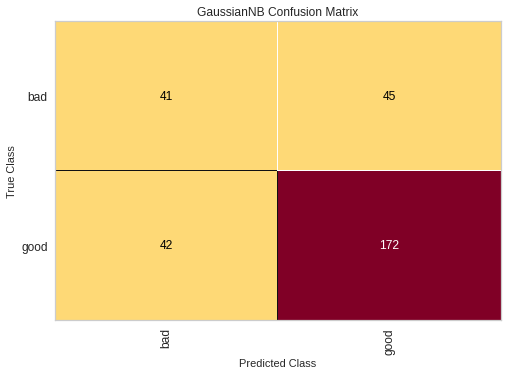

In [22]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

Simulando modelo com novos dados 

In [24]:
from google.colab import files
uploaded = files.upload()

Saving NovoCredit.csv to NovoCredit (1).csv


In [0]:
novo_credito = pd.read_csv('NovoCredit.csv')

In [29]:
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [31]:
novo_credito[:,0] = labelencoder.fit_transform(novo_credito[:,0])
novo_credito

array([[0, 12, "'existing paid'", 'radio/tv', 804, '<100', '>=7', 4,
        "'male single'", 'none', 4, 'car', 38, 'none', 'own', 1,
        'skilled', 1, 'none', 'yes']], dtype=object)

In [0]:
novo_credito[:,2] = labelencoder.fit_transform(novo_credito[:,2])
novo_credito[:,3] = labelencoder.fit_transform(novo_credito[:,3])
novo_credito[:,5] = labelencoder.fit_transform(novo_credito[:,5])
novo_credito[:,6] = labelencoder.fit_transform(novo_credito[:,6])
novo_credito[:,8] = labelencoder.fit_transform(novo_credito[:,8])
novo_credito[:,9] = labelencoder.fit_transform(novo_credito[:,9])
novo_credito[:,11] = labelencoder.fit_transform(novo_credito[:,11])
novo_credito[:,13] = labelencoder.fit_transform(novo_credito[:,13])
novo_credito[:,14] = labelencoder.fit_transform(novo_credito[:,14])
novo_credito[:,16] = labelencoder.fit_transform(novo_credito[:,16])
novo_credito[:,18] = labelencoder.fit_transform(novo_credito[:,18])
novo_credito[:,19] = labelencoder.fit_transform(novo_credito[:,19])

Aplicando algoritmo em um novo dado:

In [33]:
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')

Resposta = good